In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from rdkit import Chem
from rdkit.Chem import Descriptors

In [3]:
csv_file_path = 'dataset/HIV.csv'
df = pd.read_csv(csv_file_path)
print(f"Initial Dataset Shape: {df.shape}")
print("\nColumn Information:")
df.info()

# --- Cleaning and Preparing Data ---

# 1. Drop the specified irrelevant column
df = df.drop(columns=['activity'], errors='ignore')

# 2. Check for missing values in core columns
print("\nMissing Values Check:")
print(df.isnull().sum())

# 3. Drop rows with missing SMILES or HIV_active
df.dropna(subset=['smiles', 'HIV_active'], inplace=True)
df['HIV_active'] = df['HIV_active'].astype(int)

print(f"\nDataset Shape after reduction: {df.shape}")

Initial Dataset Shape: (41127, 3)

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41127 entries, 0 to 41126
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   smiles      41127 non-null  object
 1   activity    41127 non-null  object
 2   HIV_active  41127 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 964.0+ KB

Missing Values Check:
smiles        0
HIV_active    0
dtype: int64

Dataset Shape after reduction: (41127, 2)


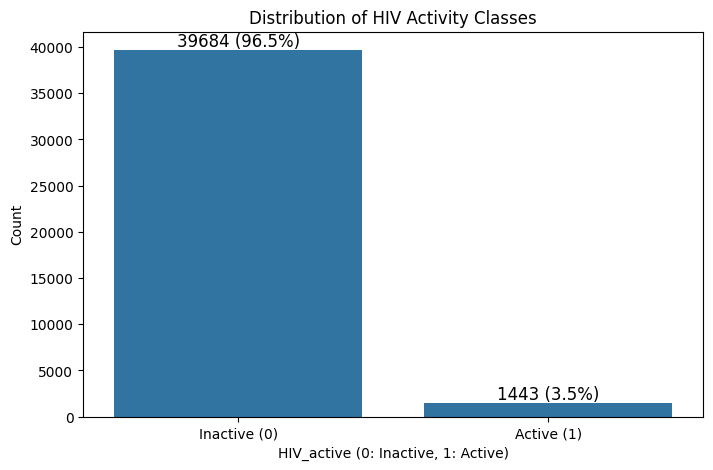


Active Ratio: 0.0351


In [6]:
plt.figure(figsize=(8, 5))
sns.countplot(x='HIV_active', data=df)
plt.title('Distribution of HIV Activity Classes')
plt.xlabel('HIV_active (0: Inactive, 1: Active)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Inactive (0)', 'Active (1)'])

total_samples = len(df)
active_count = df['HIV_active'].sum()
inactive_count = total_samples - active_count

plt.text(0, inactive_count, f'{inactive_count} ({inactive_count/total_samples:.1%})',
         ha='center', va='bottom', fontsize=12)
plt.text(1, active_count, f'{active_count} ({active_count/total_samples:.1%})',
         ha='center', va='bottom', fontsize=12)

plt.show()

print(f"\nActive Ratio: {active_count / total_samples:.4f}")
#

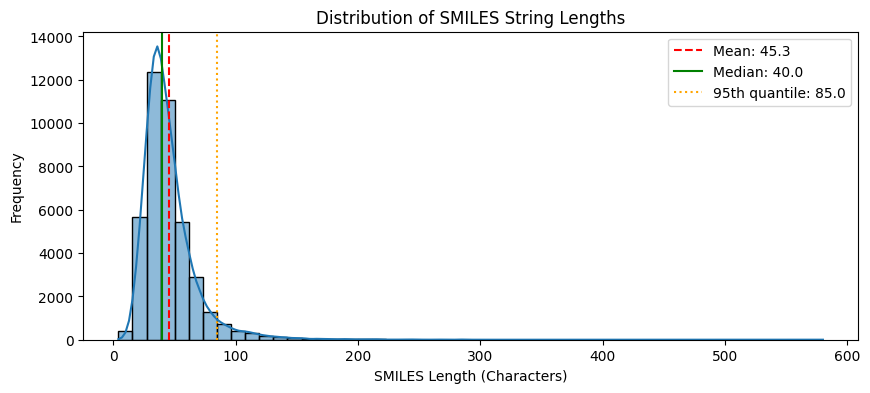


SMILES Length Summary:
   Max Length: 580
   95th quantile: 85.0


In [13]:
df['smiles_len'] = df['smiles'].apply(len)

plt.figure(figsize=(10, 4))
sns.histplot(df['smiles_len'], bins=50, kde=True)
plt.title('Distribution of SMILES String Lengths')
plt.xlabel('SMILES Length (Characters)')
plt.ylabel('Frequency')

len_mean = df['smiles_len'].mean()
len_median = df['smiles_len'].median()
len_95th = df['smiles_len'].quantile(0.95)

plt.axvline(len_mean, color='red', linestyle='--', label=f'Mean: {len_mean:.1f}')
plt.axvline(len_median, color='green', linestyle='-', label=f'Median: {len_median:.1f}')
plt.axvline(len_95th, color='orange', linestyle=':', label=f'95th quantile: {len_95th:.1f}')
plt.legend()
plt.show()

print(f"\nSMILES Length Summary:")
print(f"   Max Length: {df['smiles_len'].max()}")
print(f"   95th quantile: {len_95th:.1f}")